In [1]:
%matplotlib widget

In [2]:
import numpy as np
from numpy import log, arctan2, pi, mean
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt
import meshio
from bem import (assem, eval_sol, read_geo_gmsh,
                 surf_plot)

In [3]:
mesh, coords, elems, x_m, y_m, id_dir, id_neu = read_geo_gmsh("files/disk.msh", [0, 1], [2, 3])
theta = np.arctan2(y_m, x_m)

In this case, the analytic solution is

$$u = -\frac{r^6}{2}\cos(6\theta)\, .$$

In [4]:
Gmat, Hmat = assem(coords, elems)
q_boundary = 3*np.cos(6*theta)
u_boundary = solve(Hmat, Gmat.dot(q_boundary))

In [5]:
solution = eval_sol(mesh.points[:, :2], coords, elems, u_boundary, q_boundary)

## Visualization

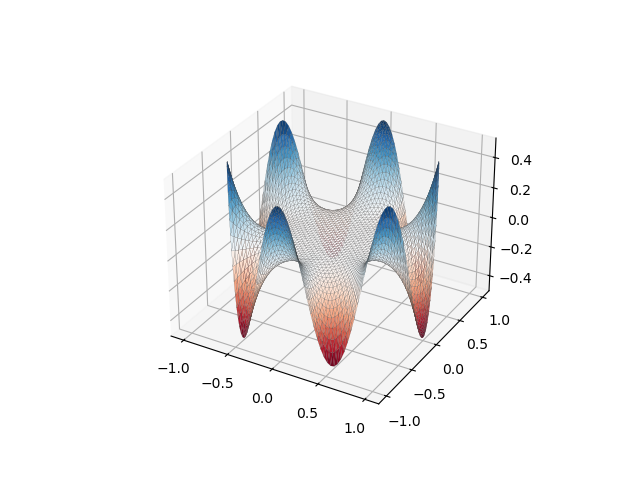

In [6]:
ax = surf_plot(mesh, 4, solution);

In [7]:
ev_x, ev_y = mesh.points[:, :2].T
ev_r = np.sqrt(ev_x**2 + ev_y**2)
ev_t = np.arctan2(ev_y, ev_x)
sol_fun = lambda r, t: -0.5*r**6*np.cos(6*t)

In [8]:
sol_analytic = sol_fun(ev_r, ev_t)

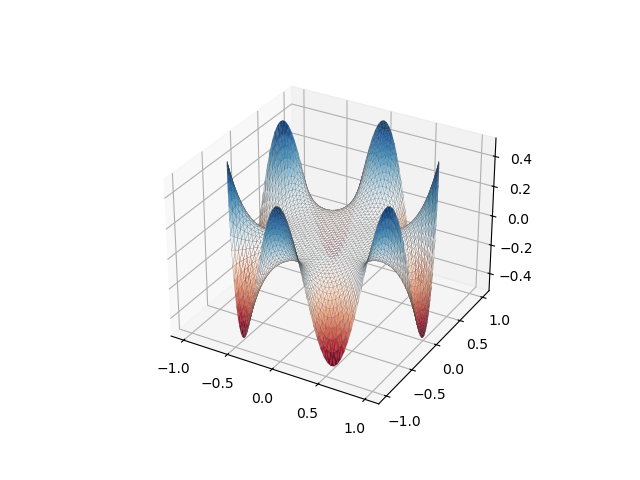

In [9]:
ax = surf_plot(mesh, 4, sol_analytic);

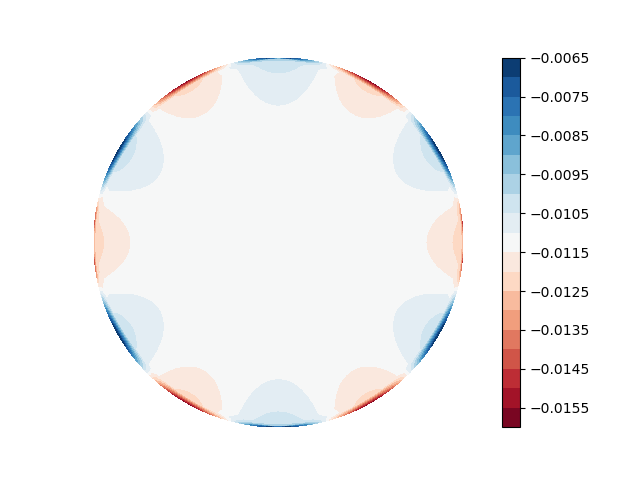

In [10]:
fig = plt.figure()
plt.tricontourf(ev_x, ev_y, sol_analytic - solution,
                18, cmap="RdBu", zorder=4)
plt.colorbar()
plt.axis("image")
plt.axis("off");

In [11]:
rel_error = 100*np.linalg.norm(sol_analytic - solution)/np.linalg.norm(sol_analytic)
print(f"The relative error is {rel_error:.2f}%")

The relative error is 6.22%
